In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('laptops_train.csv')
test = pd.read_csv('laptops_test.csv')

In [3]:
print(f'''train : {train.shape}\ntest  : {test.shape}''')

train : (977, 13)
test  : (325, 13)


In [4]:
df = train.append(test).reset_index(drop=True)

In [5]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,NaN,1.37kg,11912523.48
1,Apple,Macbook Air,Ultrabook,"13.3""",1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,NaN,1.34kg,7993374.48
2,HP,250 G6,Notebook,"15.6""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,NaN,1.86kg,5112900.00
3,Apple,MacBook Pro,Ultrabook,"15.4""",IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,NaN,1.83kg,22563005.40
4,Apple,MacBook Pro,Ultrabook,"13.3""",IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,NaN,1.37kg,16037611.20


In [6]:
for col in df.columns:
    if df[col].dtype == "O":
        print(f' \n{col} ,\n{df[col].nunique()}\n\n{df[col].unique()}')

 
Manufacturer ,
19

['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
 
Model Name ,
617

['MacBook Pro' 'Macbook Air' '250 G6' 'Aspire 3' 'ZenBook UX430UN'
 'Swift 3' 'Inspiron 3567' 'MacBook 12"' 'IdeaPad 320-15IKB' 'XPS 13'
 'Vivobook E200HA' 'Legion Y520-15IKBN' '255 G6' 'Inspiron 5379'
 '15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)' 'MacBook Air' 'Inspiron 5570'
 'Latitude 5590' 'ProBook 470' 'LapBook 15.6"'
 'E402WA-GA010T (E2-6110/2GB/32GB/W10)'
 '17-ak001nv (A6-9220/4GB/500GB/Radeon' 'IdeaPad 120S-14IAP'
 'Inspiron 5770' 'ProBook 450' 'X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)'
 'Inspiron 7577' 'X542UQ-GO005 (i5-7200U/8GB/1TB/GeForce'
 'Aspire A515-51G' 'Inspiron 7773' 'IdeaPad 320-15ISK' 'Rog Strix'
 'X751NV-TY001T (N4200/4GB/1TB/GeForce' 'Yoga Book' 'ProBook 430'
 'Inspiron 3576' '15-bs002nv (i3-6006U/4GB/128GB/FHD/W10)' 'VivoBook Max'
 'GS73VR 7RG' 'X541UA-DM1897 (i3-60

### Data Preprocessing Feature Engineering

Screen

In [7]:
df['Screen Size'] = df['Screen Size'].str.replace('"','').astype(float)

In [8]:
df['screen_width'] = df['Screen'].apply(lambda x: re.findall(r'\d+', x)).str[0].astype(int)
df['screen_height'] = df['Screen'].apply(lambda x: re.findall(r'\d+', x)).str[1].astype(int)
df['screen_type'] = df['Screen'].str.split().str[:-1].str.join(' ')

CPU

In [9]:
df['cpu_brand'] = df['CPU'].str.split().str[0:2].str.join(' ')

In [10]:
df['cpu_generation'] = df['CPU'].str.split().str[2]

In [11]:
df['CPU'].str.split().str[3].unique()

array(['2.3GHz', '1.8GHz', '7200U', '2.7GHz', '3.1GHz', '3GHz', '2.2GHz',
       '8550U', '8250U', '6006U', '2.8GHz', 'm3', '7500U', '2.9GHz',
       '7100U', '1.44GHz', '7300HQ', '1.5GHz', '1.6GHz', '8650U',
       '2.5GHz', 'Core', '7130U', '7700HQ', '2.0GHz', '1.3GHz', '7560U',
       '6200U', '6Y75', '6920HQ', '7Y54', '7820HK', 'V6', '6500U',
       '6600U', '7820HQ', '2.4GHz', '7600U', '7300U', '3.6GHz', '6440HQ',
       '6820HQ', '3.2GHz', '7Y75', '7440HQ', '7660U', 'm3-7Y30', '7Y57',
       '6700HQ', '6100U', '6820HK', '7Y30', 'v6', '6300U', 'M3-6Y30',
       '6300HQ', '2GHz', '1.92GHz', 'v5', '6260U', '1.2GHz', '6560U',
       'm7-6Y75', '2.1GHz', 'M7-6Y75', '1.1GHz', '6Y54', '6Y30'],
      dtype=object)

RAM

In [12]:
df['RAM'] = df['RAM'].apply(lambda x: re.findall('\d+',x)).str[0].astype(int)

Storage

In [13]:
df['storage'] = df[' Storage'].apply(lambda x:re.findall('\d+',x)).str[0]
df['storage_type'] = df[' Storage'].str.split().str[1:].str.join(' ')
df['storage_unit'] = df[' Storage'].str.split().str[0].str[-2:]

In [14]:
df['weight'] = df['Weight'].apply(lambda x:re.findall('\d+',x)).str.join('.')

In [15]:
laptop = df.copy()

In [16]:
df = df[['Manufacturer','Model Name','Category','RAM','GPU','Operating System','Operating System Version','weight','screen_width','screen_height','screen_type','cpu_brand','cpu_generation','storage','storage_type','storage_unit','Price']]

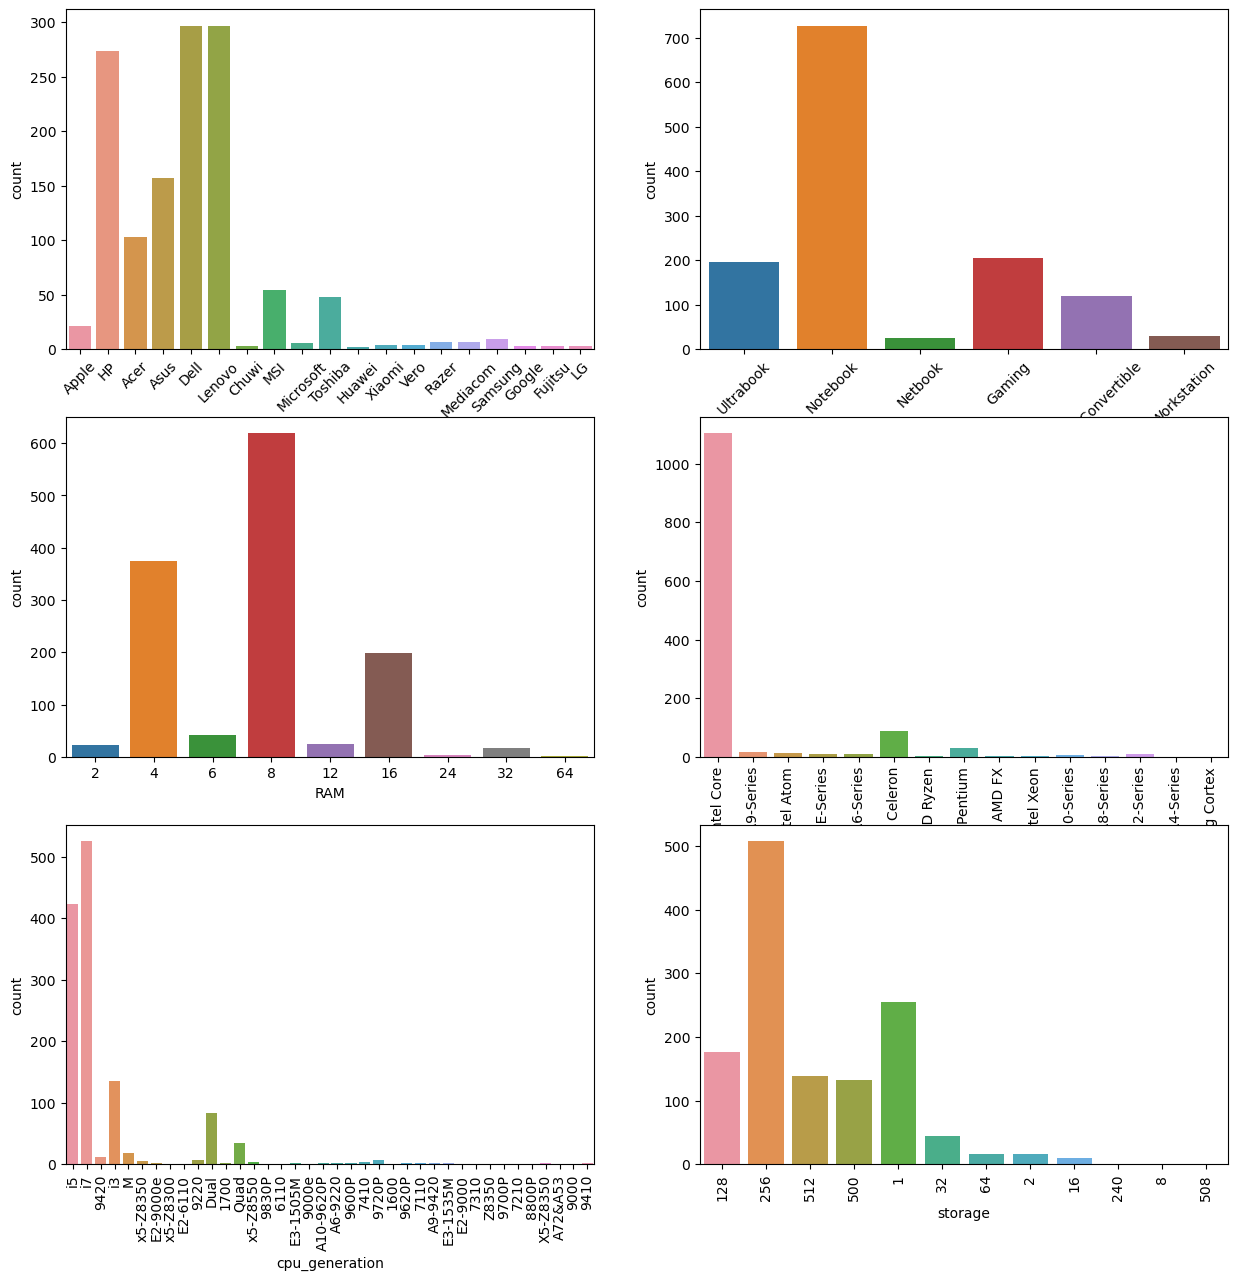

In [52]:
fig, axes = plt.subplots(nrows = 3,ncols = 2,figsize=(15,15))

sns.countplot(df['Manufacturer'], ax=axes[0, 0])
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45)  

sns.countplot(df['Category'], ax=axes[0, 1])
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=45)  

sns.countplot(df['RAM'], ax=axes[1, 0])
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels())

sns.countplot(df['cpu_brand'], ax=axes[1, 1])
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(),rotation=90)

sns.countplot(df['cpu_generation'], ax=axes[2, 0])
axes[2, 0].set_xticklabels(axes[2, 0].get_xticklabels(),rotation=90)

sns.countplot(df['storage'], ax=axes[2, 1])
axes[2, 1].set_xticklabels(axes[2, 1].get_xticklabels(),rotation=90)
plt.show()

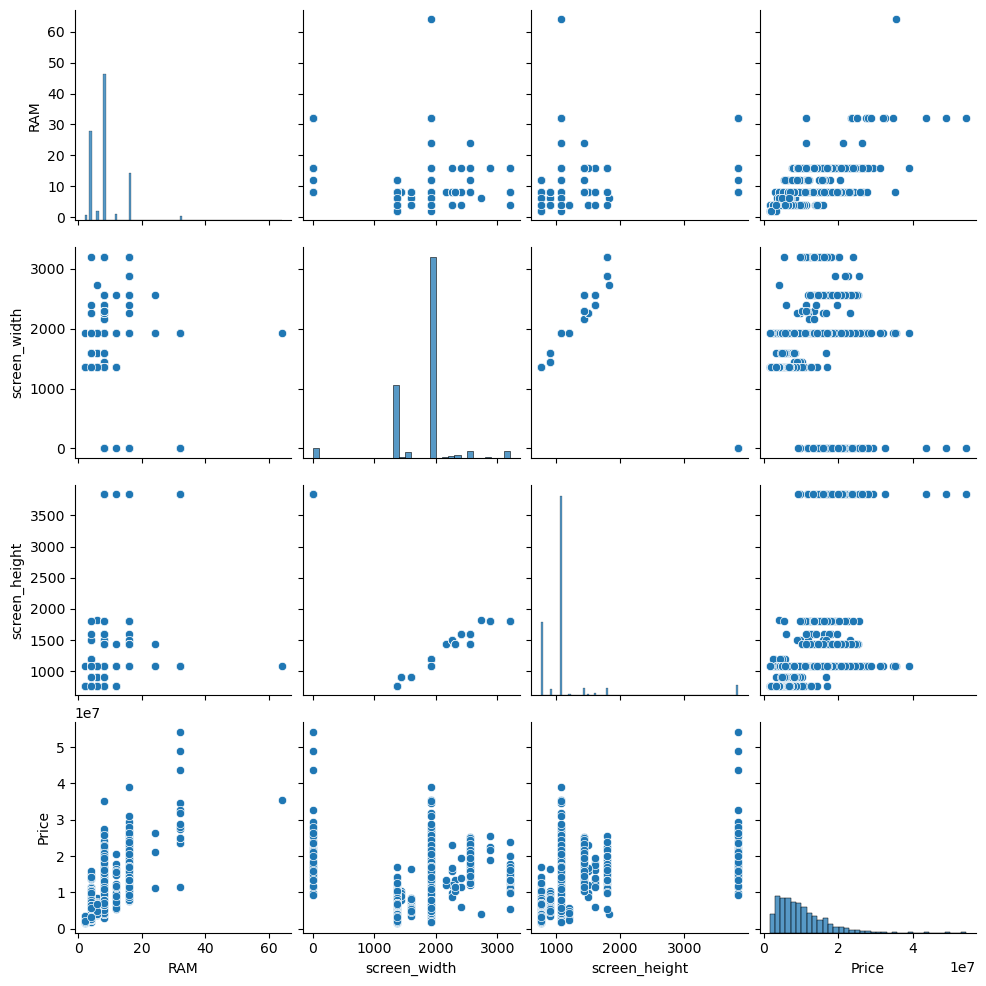

In [54]:
sns.pairplot(df)

Manufacturer

In [55]:
comp = pd.get_dummies(df[['Manufacturer','Price']],prefix='',prefix_sep='').corr()['Price'].sort_values(ascending= True)

In [56]:
company_dict = {}
for i in range(0,len(comp)-1):
    company_dict[comp.index[i]] = i

Model

In [57]:
model = pd.get_dummies(df[['Model Name','Price']],prefix='',prefix_sep='').corr()['Price'].sort_values(ascending= True)

In [58]:
model_dict = {}
for i in range(0,len(model)-1):
    model_dict[model.index[i]] = i

GPU

In [59]:
gpu = pd.get_dummies(df[['GPU','Price']],prefix='',prefix_sep='').corr()['Price'].sort_values(ascending= True)

In [60]:
gpu_dict = {}
for i in range(0,len(gpu)-1):
    gpu_dict[gpu.index[i]] = i

Operating System

In [61]:
os = pd.get_dummies(df[['Operating System','Price']],prefix='',prefix_sep='').corr()['Price'].sort_values(ascending= True)

In [62]:
os_dict = {}
for i in range(0, len(os)-1):
    os_dict[os.index[i]] = i

Screen

In [63]:
screen_type = pd.get_dummies(df[['screen_type','Price']],prefix='',prefix_sep='').corr()['Price'].sort_values(ascending= True)

In [64]:
screen_type_dict = {}
for i in range(0, len(screen_type)-1):
    screen_type_dict[screen_type.index[i]] = i

CPU Brand

In [65]:
cpu_brand = pd.get_dummies(df[['cpu_brand','Price']],prefix='',prefix_sep='').corr()['Price'].sort_values(ascending= True)

In [66]:
cpu_brand_dict = {}
for i in range(0, len(cpu_brand)-1):
    cpu_brand_dict[cpu_brand.index[i]] = i

CPU Generation 

In [67]:
cpu_gen = pd.get_dummies(df[['cpu_generation','Price']],prefix='',prefix_sep='').corr()['Price'].sort_values(ascending= True)

In [68]:
cpu_gen_dict = {}
for i in range(0, len(cpu_gen)-1):
    cpu_gen_dict[cpu_gen.index[i]] = i

storage

In [69]:
df['storage'] = df['storage'].astype(int)

In [70]:
for i in range(0,len(df['storage'])):
    if df['storage'][i] in [1,2]:
        df['storage'][i] = df['storage'][i] * 1024

storage type

In [71]:
storage_type = pd.get_dummies(df[['storage_type','Price']],prefix='',prefix_sep='').corr()['Price'].sort_values(ascending= True)

storage_type_dict = {}
for i in range(0, len(storage_type)-1):
    storage_type_dict[storage_type.index[i]] = i

In [72]:
category = pd.get_dummies(df[['Category','Price']],prefix='',prefix_sep='').corr()['Price'].sort_values(ascending= True)

category_dict = {}
for i in range(0, len(category)-1):
    category_dict[category.index[i]] = i

In [73]:
os_ver = pd.get_dummies(df[['Operating System Version','Price']],prefix='',prefix_sep='').corr()['Price'].sort_values(ascending= True)

In [74]:
os_ver_dict = {}
for i in range(0, len(os_ver)-1):
    os_ver_dict[os_ver.index[i]] = i

In [75]:
laps = df.copy()

In [76]:
df.drop(columns=['storage_unit'],inplace=True)

In [77]:
df['Manufacturer'] = df['Manufacturer'].replace(company_dict)

In [78]:
df['Model Name'] = df['Model Name'].replace(model_dict)

In [79]:
df['Category'] = df['Category'].replace(category_dict)

In [80]:
df['GPU'] = df['GPU'].replace(gpu_dict)

In [81]:
df['Operating System'] = df['Operating System'].replace(os_dict)

In [82]:
df['Operating System Version'] = df['Operating System Version'].replace(os_ver_dict)

In [83]:
df['screen_type'] = df['screen_type'].replace(screen_type_dict)

In [84]:
df['cpu_brand'] = df['cpu_brand'].replace(cpu_brand_dict)
df['cpu_generation'] = df['cpu_generation'].replace(cpu_gen_dict)

In [85]:
df['storage_type'] = df['storage_type'].replace(storage_type_dict)

In [86]:
df['Operating System'] = df['Operating System'].astype(int)

In [87]:
df['weight'] = df['weight'].astype(float)

In [88]:
df['Operating System Version'] = pd.to_numeric(df['Operating System Version'], errors='coerce')

Missing Value Imputation

In [89]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)

In [90]:
df['Operating System Version'] = imputer.fit_transform(df['Operating System Version'].values.reshape(-1,1)).astype(int)

In [91]:
os_ver_dict

{'X': 0, '10 S': 1, '10': 2, '7': 3}

In [92]:
df['Operating System Version'].value_counts()

2    1241
3      45
0       8
1       8
Name: Operating System Version, dtype: int64

In [93]:
df.isnull().sum()

Manufacturer                0
Model Name                  0
Category                    0
RAM                         0
GPU                         0
Operating System            0
Operating System Version    0
weight                      0
screen_width                0
screen_height               0
screen_type                 0
cpu_brand                   0
cpu_generation              0
storage                     0
storage_type                0
Price                       0
dtype: int64

In [95]:
correlation = df.corr()
correlation

,Manufacturer,Model Name,Category,RAM,GPU,Operating System,Operating System Version,weight,screen_width,screen_height,screen_type,cpu_brand,cpu_generation,storage,storage_type,Price
Manufacturer,1.000000,0.241615,0.298401,0.267224,0.247486,0.067445,-0.139991,0.077123,0.022160,0.171014,0.080725,0.251586,0.178806,-0.054844,0.164045,0.284196
Model Name,0.241615,1.000000,0.631182,0.547941,0.616804,0.299621,0.075352,0.022072,0.213362,0.404286,0.463995,0.435562,0.496305,-0.216158,0.537694,0.832099
Category,0.298401,0.631182,1.000000,0.502242,0.575642,0.155035,-0.066093,0.162748,0.191614,0.241447,0.385275,0.262703,0.496969,-0.199004,0.403833,0.582003
RAM,0.267224,0.547941,0.502242,1.000000,0.533139,0.159608,-0.007057,0.383776,0.061515,0.373637,0.417847,0.330436,0.565485,0.012422,0.403303,0.742802
GPU,0.247486,0.616804,0.575642,0.533139,1.000000,0.198967,-0.066464,0.266687,0.119665,0.299517,0.443022,0.523541,0.430080,-0.094446,0.392843,0.641267
Operating System,0.067445,0.299621,0.155035,0.159608,0.198967,1.000000,0.079855,-0.011743,0.056324,0.111808,0.169365,0.131329,0.162794,-0.143020,0.249768,0.270474
Operating System Version,-0.139991,0.075352,-0.066093,-0.007057,-0.066464,0.079855,1.000000,0.054148,-0.046629,-0.013465,0.013441,0.041440,-0.008224,0.011978,0.081547,0.094033
weight,0.077123,0.022072,0.162748,0.383776,0.266687,-0.011743,0.054148,1.000000,-0.114935,0.001018,0.134247,0.137050,0.210351,0.173615,-0.014144,0.210166
screen_width,0.022160,0.213362,0.191614,0.061515,0.119665,0.056324,-0.046629,-0.114935,1.000000,-0.368201,0.257335,0.210100,0.154578,-0.116332,0.218604,0.087116
screen_height,0.171014,0.404286,0.241447,0.373637,0.299517,0.111808,-0.013465,0.001018,-0.368201,1.000000,0.424043,0.194539,0.296320,-0.031492,0.278831,0.483376


<AxesSubplot:>

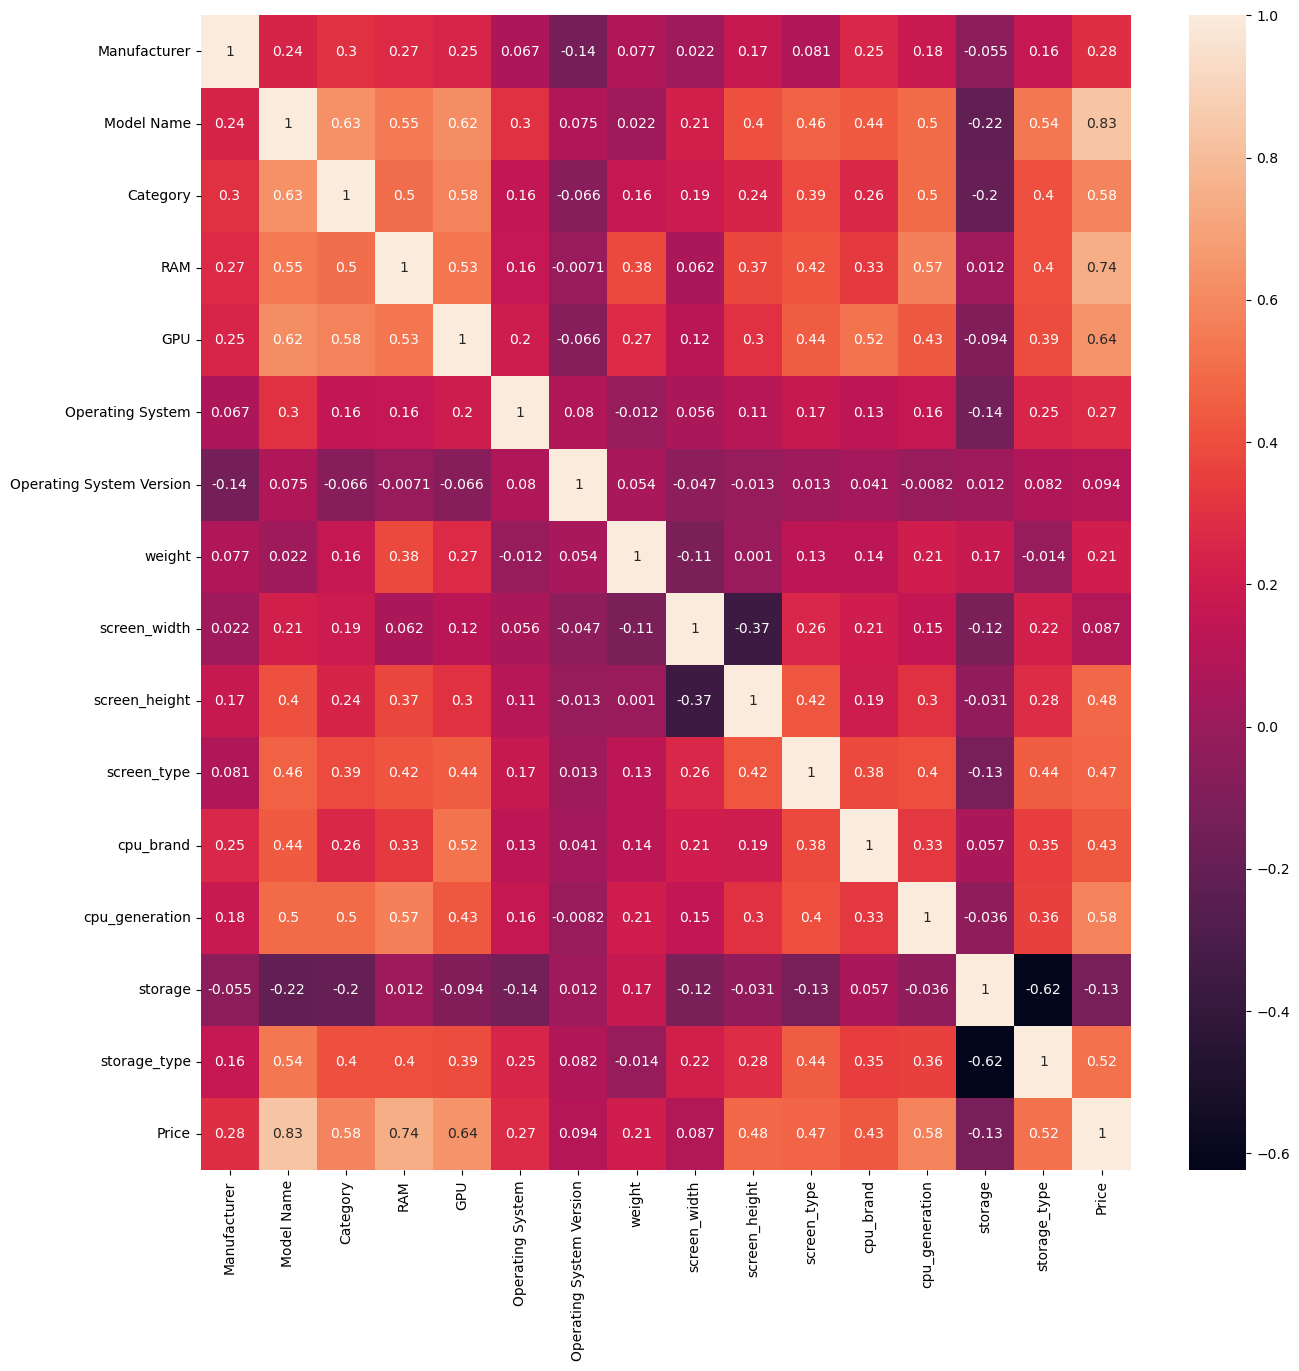

In [108]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation ,annot=True)

<AxesSubplot:>

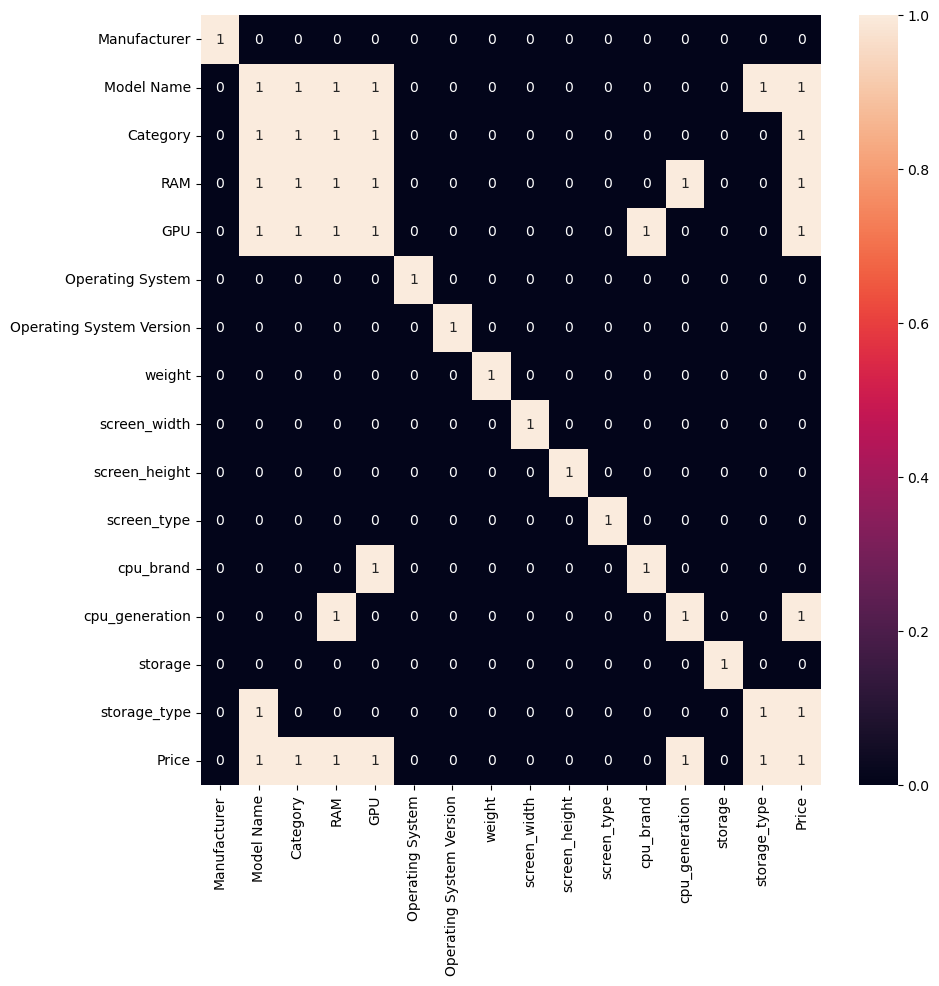

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation > 0.5,annot=True)

Model Training, Testing and Evaluation

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [110]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [111]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [112]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [113]:
lr_model = LinearRegression()

In [114]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [115]:
y_pred = lr_model.predict(X_test)

In [116]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [117]:
r2_score(y_test,y_pred)

0.811066149633331

In [118]:
print('Mean Squared Error      : ',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error     : ',mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r squared               : ',r2_score(y_test,y_pred))

Mean Squared Error      :  7709004777024.585
Mean Absolute Error     :  1767669.0303184676
Root Mean Squared Error :  2776509.4591995515
r squared               :  0.811066149633331


In [119]:
scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

In [120]:
scores

array([-1749087.67796331, -1876696.30522503, -1561048.19077249,
       -1808603.75279463, -1839203.83306296])

In [121]:
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [122]:
scaled_pred = lr_model.predict(X_test_scaled)

In [123]:
print('Mean Squared Error      : ',mean_squared_error(y_test,scaled_pred))
print('Mean Absolute Error     : ',mean_absolute_error(y_test,scaled_pred))
print('Root Mean Squared Error : ',np.sqrt(mean_squared_error(y_test,scaled_pred)))
print('r squared               : ',r2_score(y_test,scaled_pred))

Mean Squared Error      :  7709004777024.555
Mean Absolute Error     :  1767669.0303184672
Root Mean Squared Error :  2776509.459199546
r squared               :  0.8110661496333318


In [124]:
true_predicted_values = {'y_test_values': [], 'y_pred_values': []}

for true_value, predicted_value in zip(y_test, y_pred):
    true_predicted_values['y_test_values'].append(true_value)
    true_predicted_values['y_pred_values'].append(predicted_value)

In [125]:
test_pred = pd.DataFrame(true_predicted_values)

In [126]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
test_pred

,y_test_values,y_pred_values
0,6002100.00,4784280.54
1,11990684.16,13095875.79
2,18664308.00,18210945.29
3,16885908.00,17574758.86
4,4081428.00,4462031.55
...,...,...
256,9292140.00,11367598.16
257,8705268.00,11122066.00
258,9754524.00,14263919.69
259,15996708.00,17155010.58
